### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data (Population for United Kingdom))

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'HE4BxMhCa3syMSUuESRz'

In [3]:
# Importing the Federal Reserve Economic Data "Population for United Kingdom" variable.

data = quandl.get('FRED/POPTTLGBA148NRUG')

In [4]:
data.head(100)

,Value
Date,
1950-01-01,50.074245
1951-01-01,50.237076
1952-01-01,50.376928
1953-01-01,50.539755
1954-01-01,50.711574
...,...
2015-01-01,65.860146
2016-01-01,66.297944
2017-01-01,66.727461


In [5]:
data.tail()

,Value
Date,
2015-01-01,65.860146
2016-01-01,66.297944
2017-01-01,66.727461
2018-01-01,67.141684
2019-01-01,67.530172


In [6]:
data.shape

(70, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

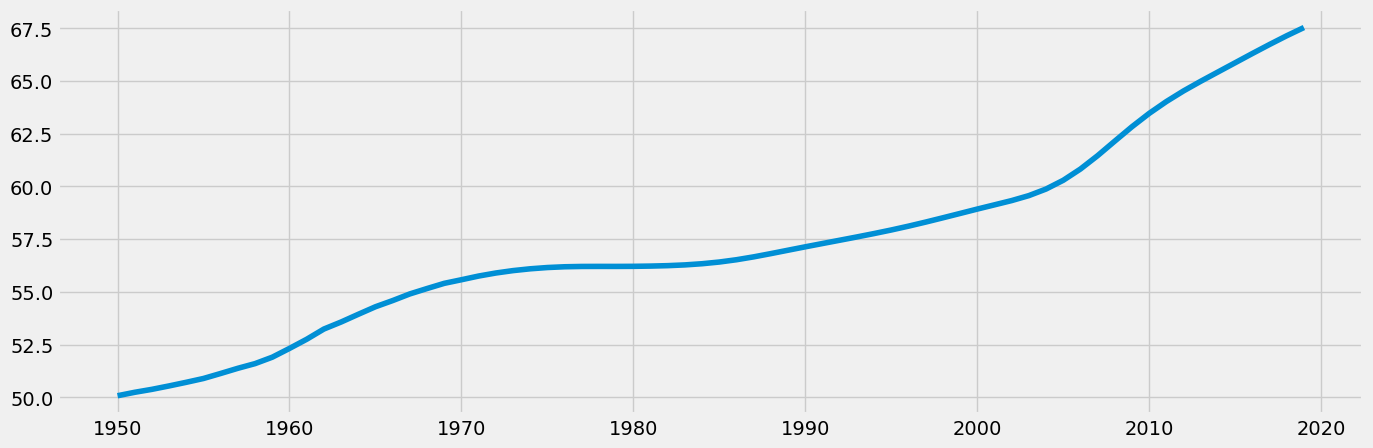

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [10]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [11]:
data_2.head()

,Date,Value
0,1950-01-01,50.074245
1,1951-01-01,50.237076
2,1952-01-01,50.376928
3,1953-01-01,50.539755
4,1954-01-01,50.711574


In [12]:
data_2.tail()

,Date,Value
65,2015-01-01,65.860146
66,2016-01-01,66.297944
67,2017-01-01,66.727461
68,2018-01-01,67.141684
69,2019-01-01,67.530172


In [13]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-02-01')]

### I have choosen this range as economic conditions in the present are different than in the 50s to 80s, so I wouldn't want that data influecing my calculations.

In [14]:
data_sub.shape

(40, 2)

In [15]:
data_sub.head(50)

,Date,Value
30,1980-01-01,56.209171
31,1981-01-01,56.220735
32,1982-01-01,56.241412
33,1983-01-01,56.276798
34,1984-01-01,56.332901
35,1985-01-01,56.413553
36,1986-01-01,56.522503
37,1987-01-01,56.658270
38,1988-01-01,56.812757
39,1989-01-01,56.974297


In [16]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-01-01,56.209171
1981-01-01,56.220735
1982-01-01,56.241412
1983-01-01,56.276798
1984-01-01,56.332901


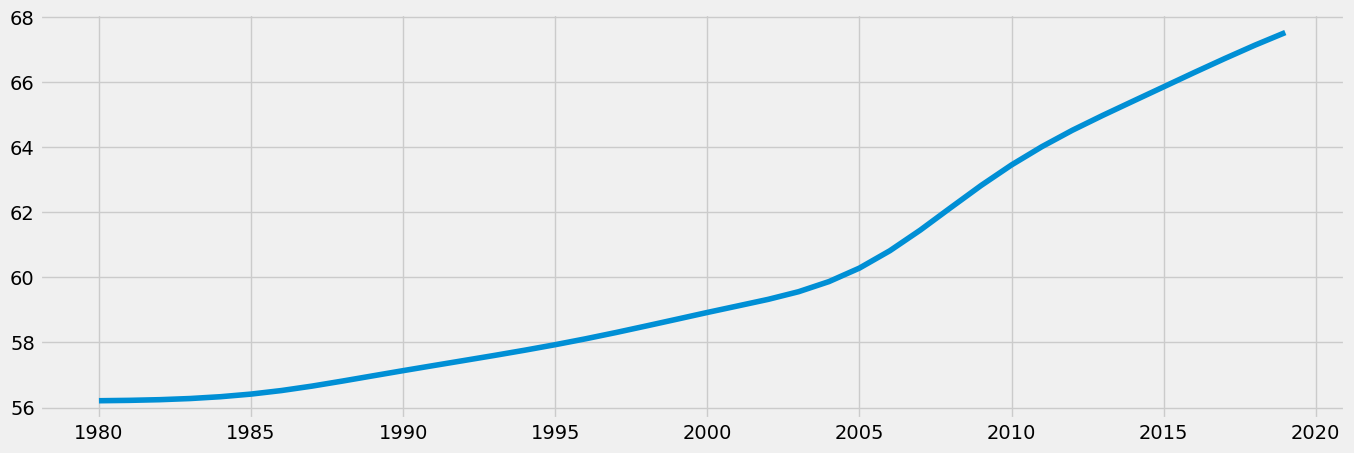

In [17]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [18]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

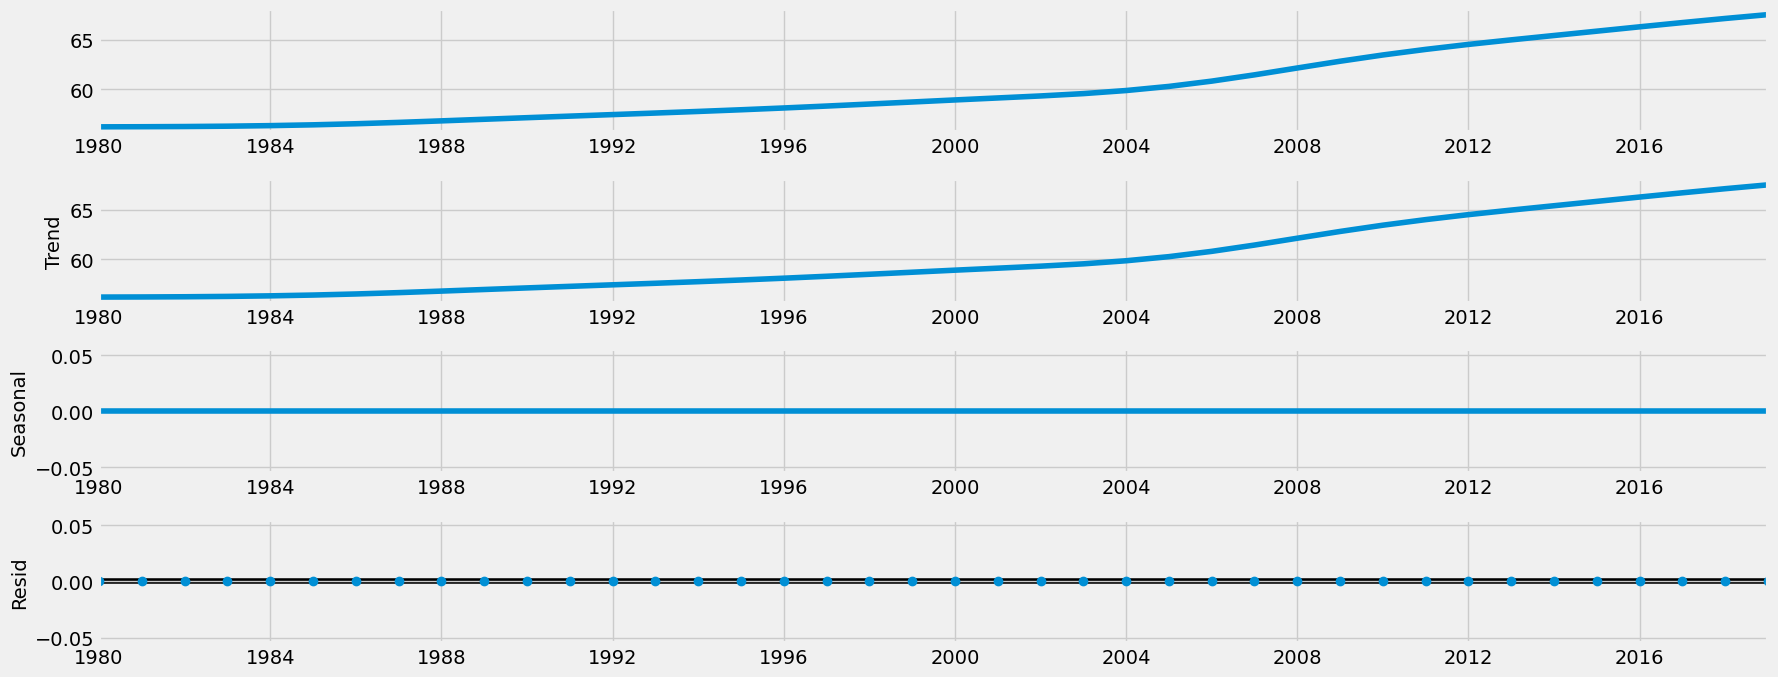

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

### The first chart, called Level, represents the data itself (including all of its components). We can see some upward trend in the population for UK.
### The second chart represents the Underlying Trend. We cannot spot any noise, it doesn't have fluctuations that aren't explained by the trend. The trend gradually rises in a linear fashion. We can observe some slight increase  of the UK population between around 2006, and probably it was due to the direct contribution of net migration.
### The third chart represents the Seasonality. We can not observe any seasonality.
### The fourth chart represents the Noise, or so called "residual". And we can see no noise.

### 4. Testing for stationarity

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.099347
p-value                         0.995211
Number of Lags Used             9.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


### We can observe that the Critical Value, with a significance level of 5 percent, has a value of -2.964071. This is much smaller than the Test Statistic, which is 1.099347, which means that we can't reject the null hypothesis. (The null hypothesis says that there exists a unit root, which would mean that the data is stationary.) In our case when we can't rule out the null hypothesis means that our data is non-stationary.

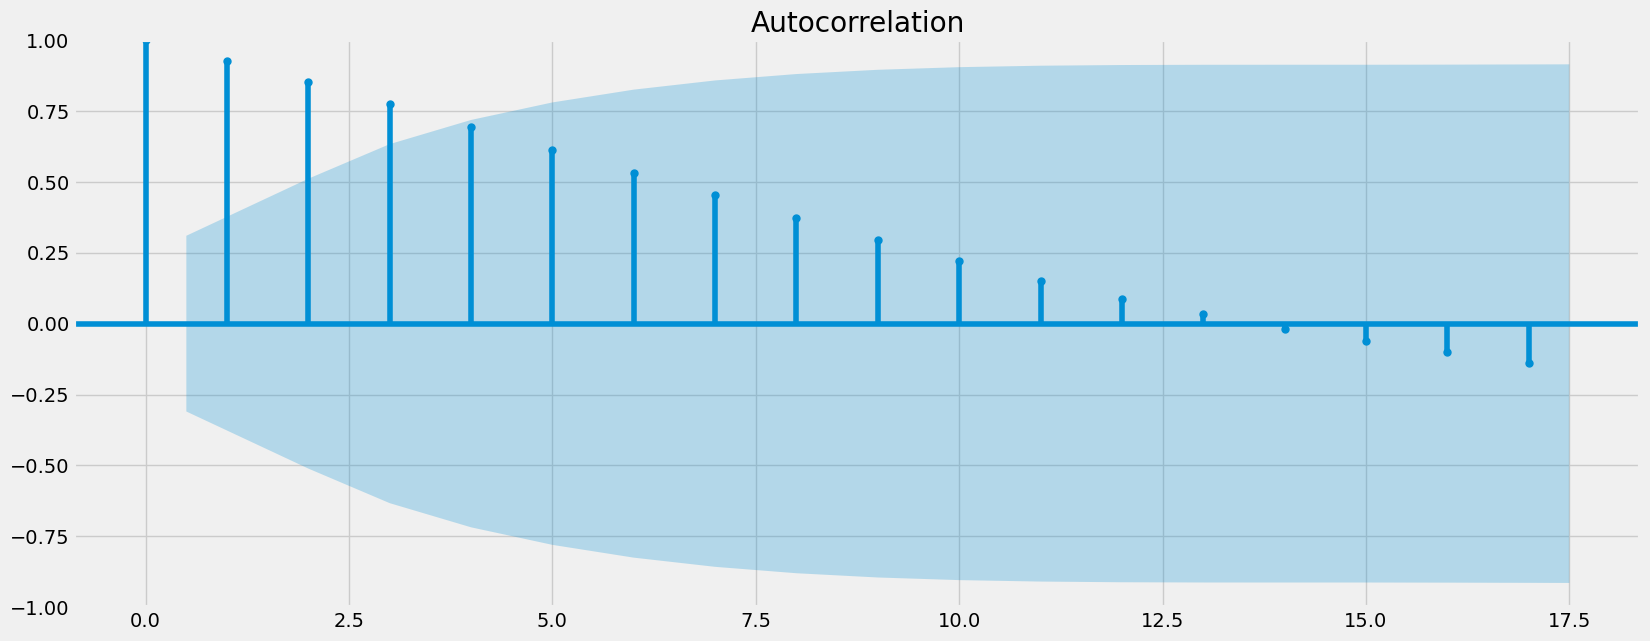

In [23]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### 5. Stationarizing the Federal Reserve Economic Data

In [24]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [25]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [26]:
data_diff.head(60)

,Value
datetime,
1981-01-01,0.011564
1982-01-01,0.020677
1983-01-01,0.035386
1984-01-01,0.056103
1985-01-01,0.080652
1986-01-01,0.108950
1987-01-01,0.135767
1988-01-01,0.154487
1989-01-01,0.161540


In [27]:
data_diff.columns

Index(['Value'], dtype='object')

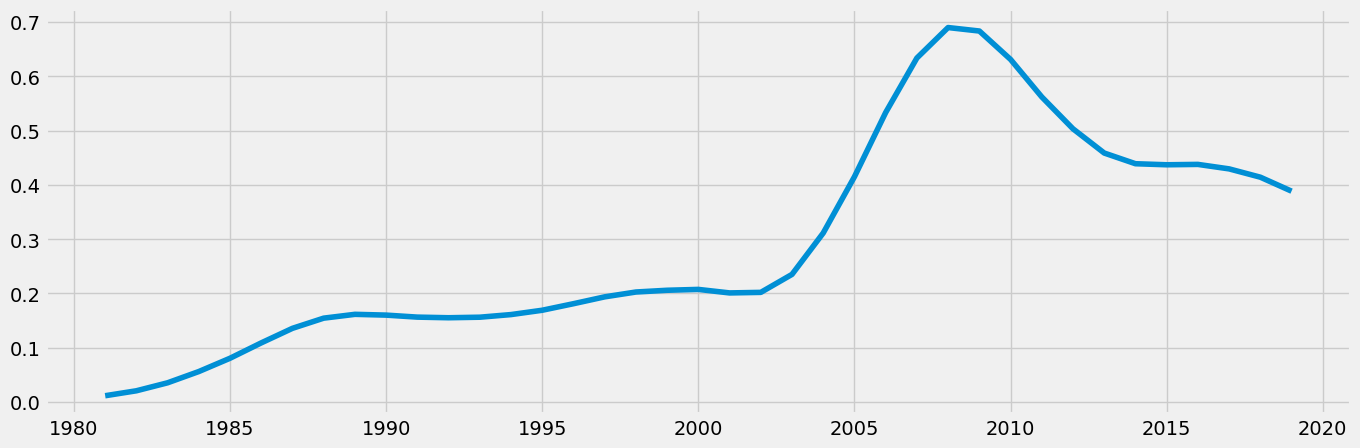

In [28]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [29]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.963929
p-value                         0.766192
Number of Lags Used             7.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


### We can observe that the Critical Value, with a significance level of 5 percent, has a value of --2.960525. This is much smaller than the Test Statistic, which is -0.963929, which means that we still can't reject the null hypothesis. (The null hypothesis says that there exists a unit root, which would mean that the data is stationary.) In our case when we still can't rule out the null hypothesis means that our data is non-stationary.

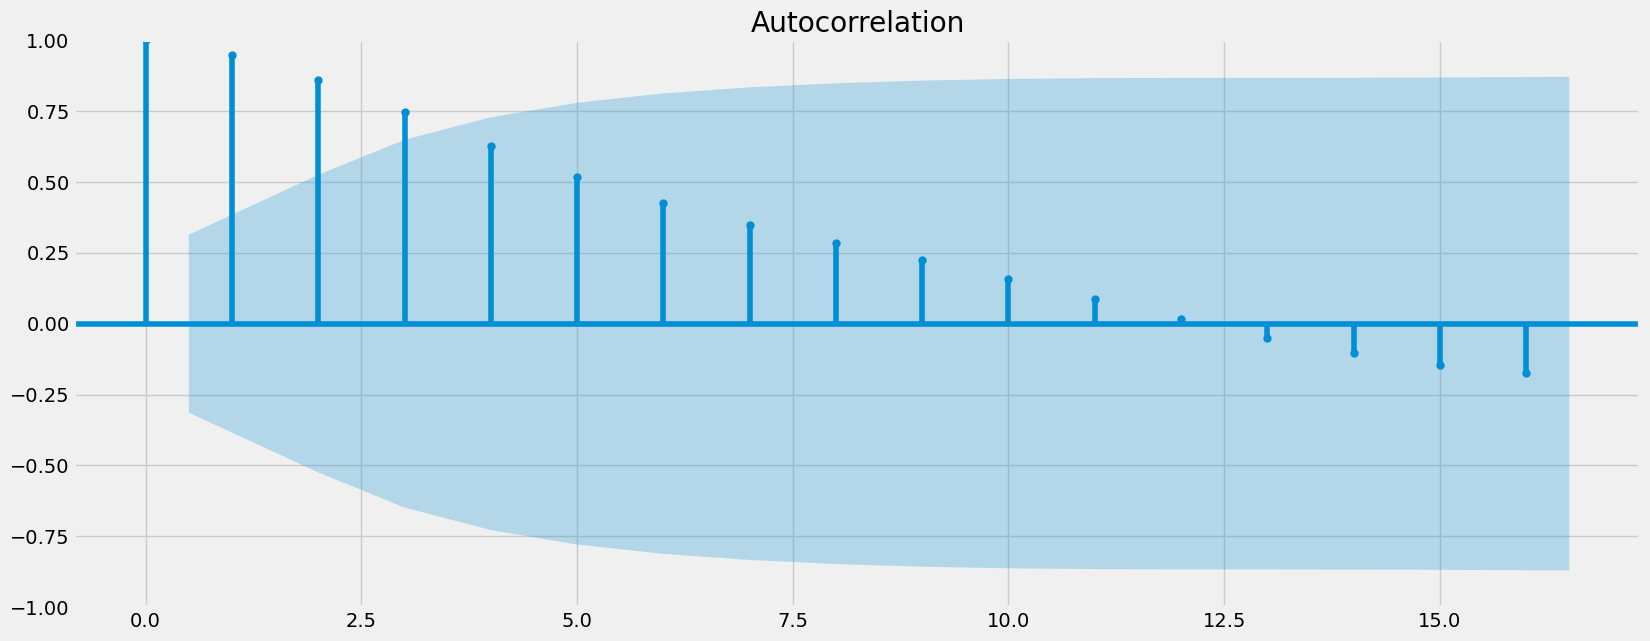

In [30]:
plot_acf(data_diff)
plt.show()

### The vertical lines represent the lags in the series, while the blue area represents the confidence interval. Because lines goes above the blue edge of the confidence interval, this means that we have lags that are significantly correlated with each other, so I can deduce that this data is non-stationary.

### Because of the unspoken rule of thumb, which states that we need at least ten significant lags (or ten vertical lines above the confidence interval) for a second round of differencing to be necessary, I will stop with conducting another roud of differencing.

### I have proven, beyond a doubt, that my data is non-stationary (has a trend)

# 6.6 Time Series Forecasting in Python Bonus

### This script contains the following:

#### 1. Defining Your Parameters
#### 2. Splitting the Data
#### 3. Running and Fitting the Model
#### 4. Iterating

### 1. Defining Your Parameters

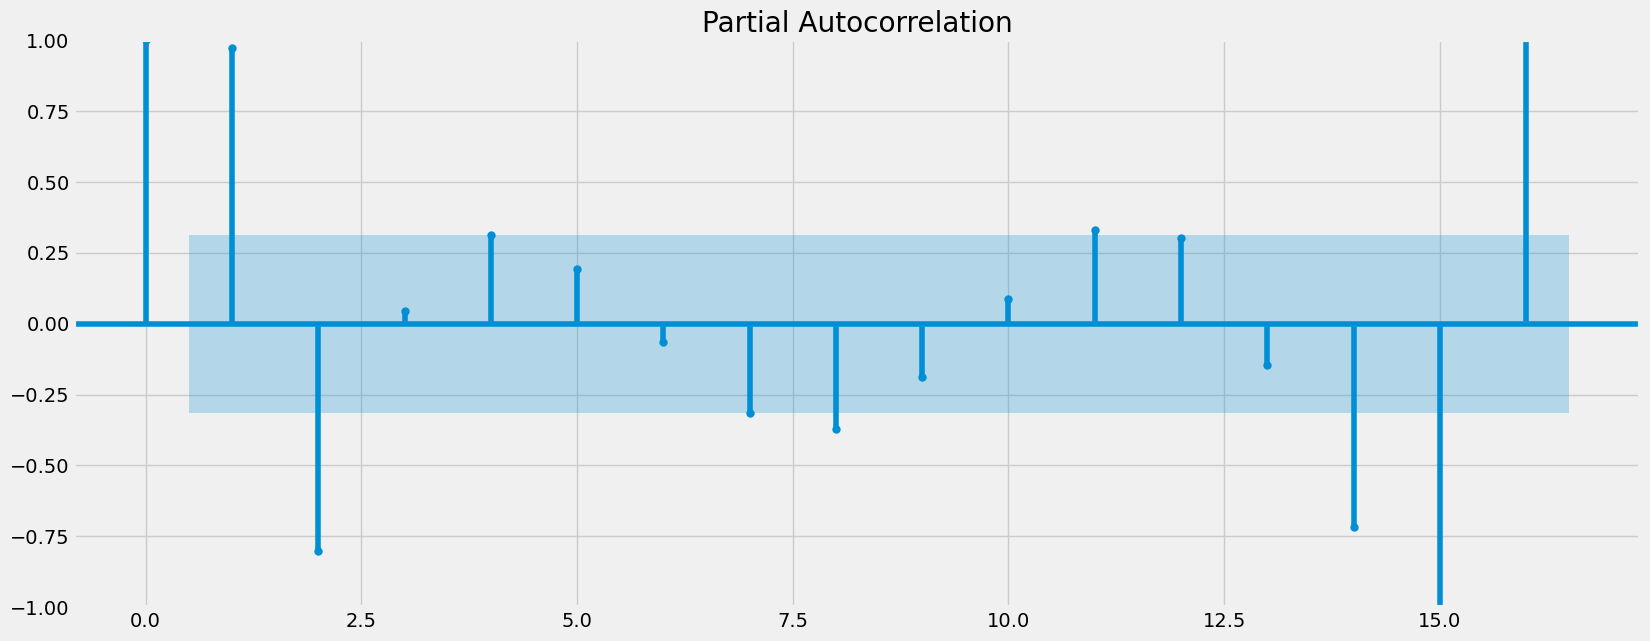

<Figure size 4500x4500 with 0 Axes>

In [31]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

#### In the figure above, you can see that there re some highly positive bars. These indicate significant correlations. Let’s start by picking 2 AR terms to compensate for the highest of the partial autocorrelations. This makes p = 2.


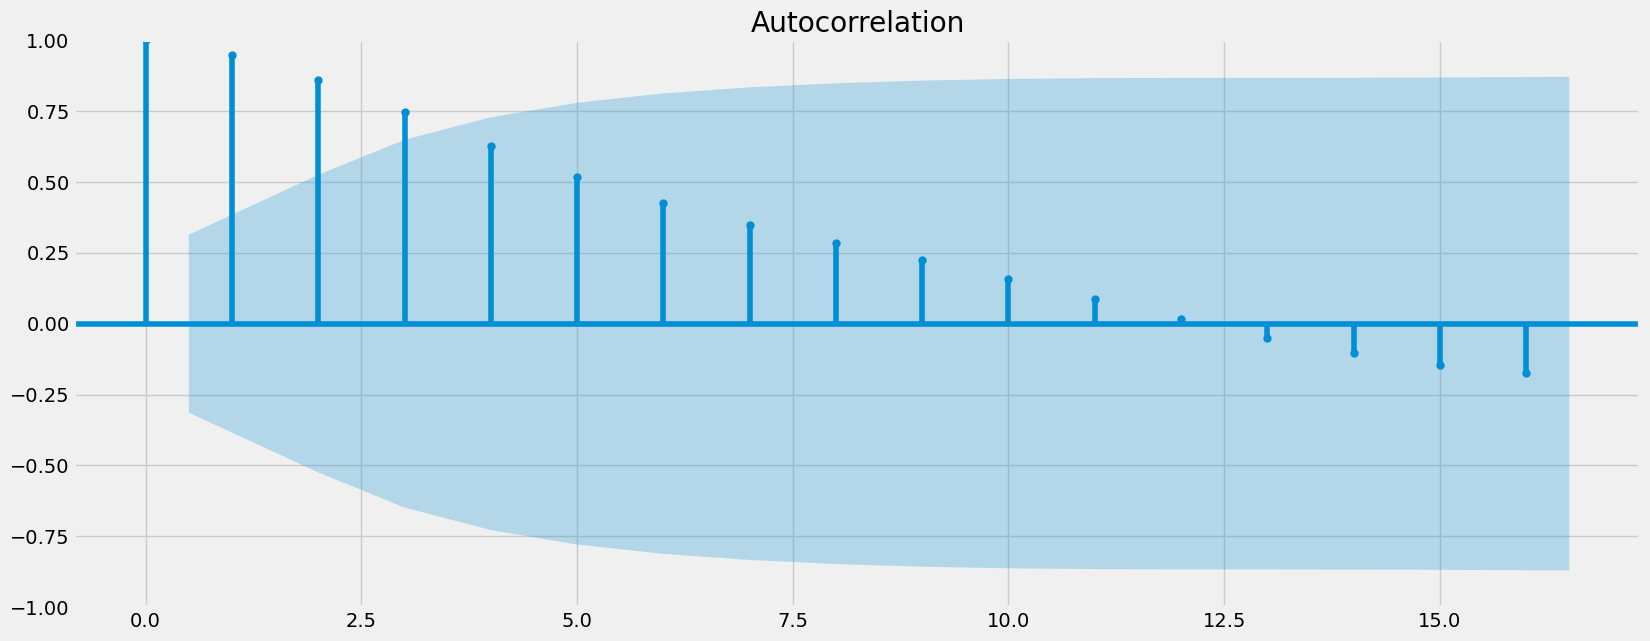

<Figure size 1500x500 with 0 Axes>

In [32]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

#### You have four significant autocorrelations here (those that run beyond the blue border), but for now, you can take a more conservative approach and see what the output is like at q = 2. (It’s advisable to start with fewer terms as opposed to more and adjust accordingly further down the line as you begin testing the model.)

### 2. Splitting the Data

In [33]:
# Split the data

train = data_diff['Value'][:21]
test = data_diff['Value'][20:]

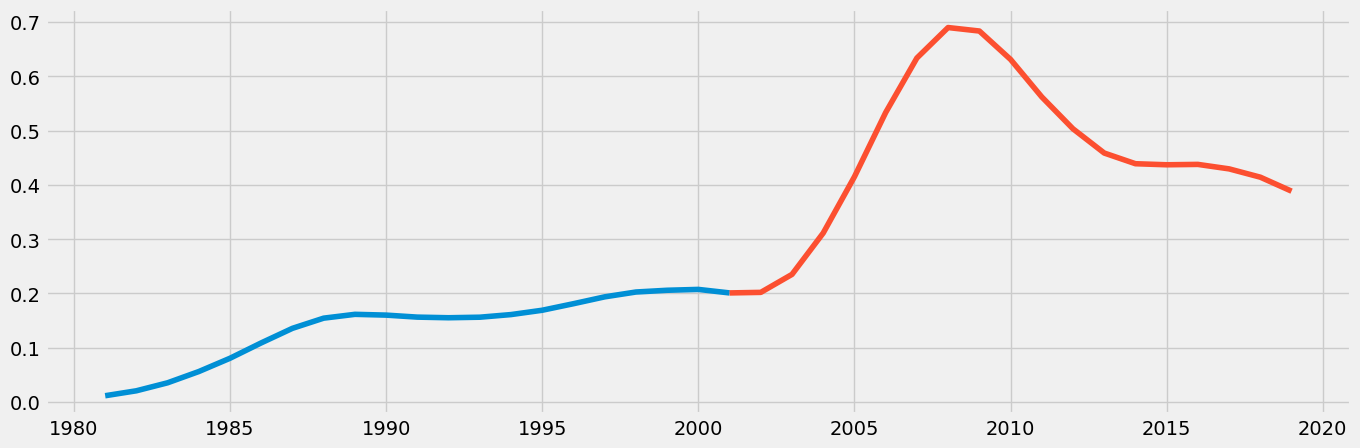

In [34]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [35]:
test.shape

(19,)

### 3. Running and Fitting the Model

In [36]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [39]:
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   21
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  86.114
Date:                Mon, 24 Jul 2023   AIC                           -162.229
Time:                        17:30:04   BIC                           -157.250
Sample:                    01-01-1981   HQIC                          -161.257
                         - 01-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4457      0.436      3.315      0.001       0.591       2.300
ar.L2         -0.6436      0.383     -1.681      0.093      -1.394       0.107
ma.L1          0.4921      0.579      0.850      0.3

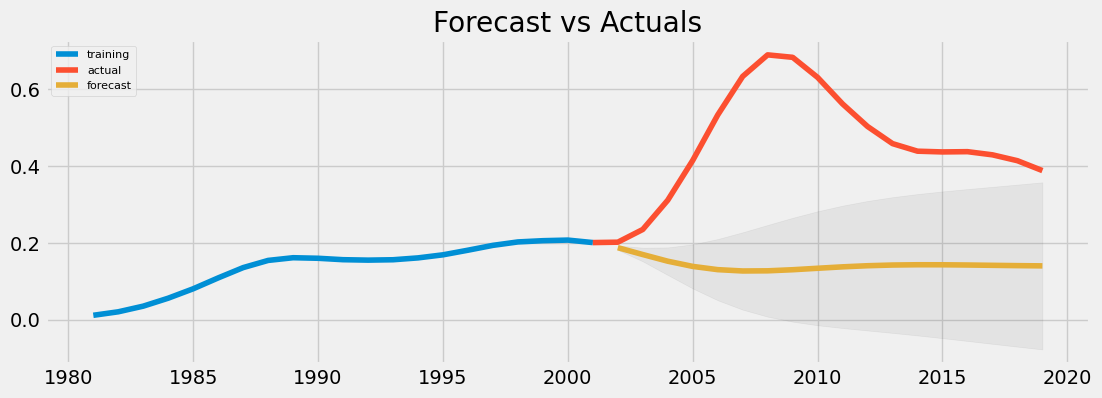

In [41]:
# Forecast_values
forecast_values = fitted.forecast(19, alpha=0.05) # # 95% confidence interval  --> alpha = 0.05; 19 is the shape of the test set

# Unpack the forecasted values
fc = forecast_values  # Forecasted values

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Get the confidence intervals from the forecast object
forecast_object = fitted.get_forecast(steps=19, alpha=0.05)
conf_int = forecast_object.conf_int()

# Create pandas series for lower and upper bounds of the confidence interval
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # The above code uses
#iloc to access the columns of the conf_int DataFrame correctly, ensuring that the lower_series and upper_series are created with the appropriate data.

# Plot the forecast and confidence interval
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(test.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


### 4. Iterating

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   21
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  86.031
Date:                Mon, 24 Jul 2023   AIC                           -164.062
Time:                        18:31:18   BIC                           -160.080
Sample:                    01-01-1981   HQIC                          -163.285
                         - 01-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5551      0.237      6.554      0.000       1.090       2.020
ar.L2         -0.7144      0.236     -3.033      0.002      -1.176      -0.253
ma.L1          0.2914      0.440      0.662      0.5

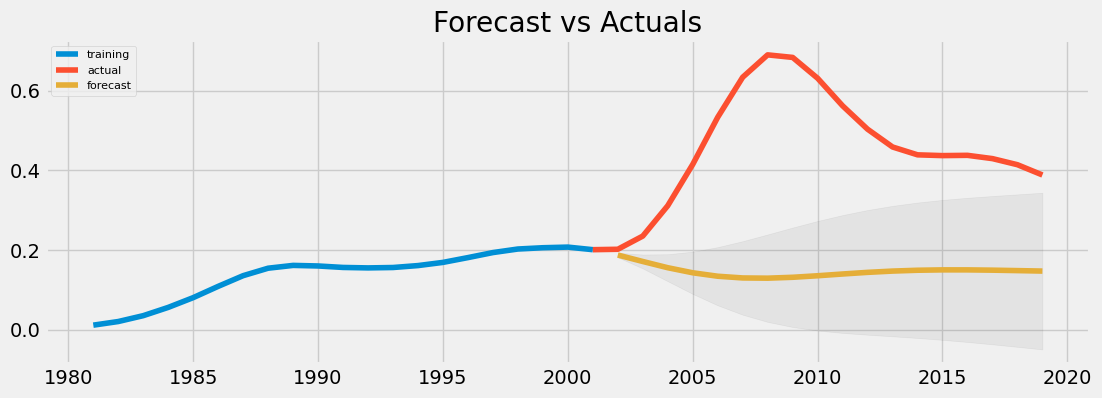

In [42]:
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast_values
forecast_values = fitted.forecast(19, alpha=0.05) # # 95% confidence interval  --> alpha = 0.05; 19 is the shape of the test set

# Unpack the forecasted values
fc = forecast_values  # Forecasted values

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Get the confidence intervals from the forecast object
forecast_object = fitted.get_forecast(steps=19, alpha=0.05)
conf_int = forecast_object.conf_int()

# Create pandas series for lower and upper bounds of the confidence interval
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # The above code uses
#iloc to access the columns of the conf_int DataFrame correctly, ensuring that the lower_series and upper_series are created with the appropriate data.

# Plot the forecast and confidence interval
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(test.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   21
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  85.044
Date:                Mon, 24 Jul 2023   AIC                           -162.088
Time:                        18:31:59   BIC                           -158.105
Sample:                    01-01-1981   HQIC                          -161.310
                         - 01-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8635      0.141      6.107      0.000       0.586       1.141
ma.L1          1.3078      0.436      3.001      0.003       0.454       2.162
ma.L2          0.6800      0.523      1.299      0.1

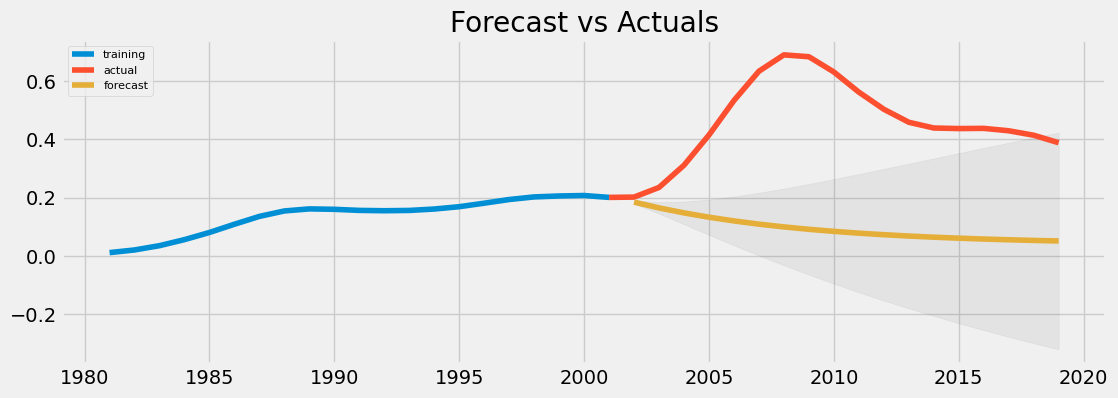

In [43]:
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast_values
forecast_values = fitted.forecast(19, alpha=0.05) # # 95% confidence interval  --> alpha = 0.05; 19 is the shape of the test set

# Unpack the forecasted values
fc = forecast_values  # Forecasted values

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Get the confidence intervals from the forecast object
forecast_object = fitted.get_forecast(steps=19, alpha=0.05)
conf_int = forecast_object.conf_int()

# Create pandas series for lower and upper bounds of the confidence interval
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # The above code uses
#iloc to access the columns of the conf_int DataFrame correctly, ensuring that the lower_series and upper_series are created with the appropriate data.

# Plot the forecast and confidence interval
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(test.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  79.522
Date:                Mon, 24 Jul 2023   AIC                           -153.044
Time:                        18:33:21   BIC                           -150.057
Sample:                    01-01-1981   HQIC                          -152.461
                         - 01-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8420      0.149      5.664      0.000       0.551       1.133
ma.L1          0.9442      0.246      3.834      0.000       0.461       1.427
sigma2      1.642e-05   6.94e-06      2.367      0.0

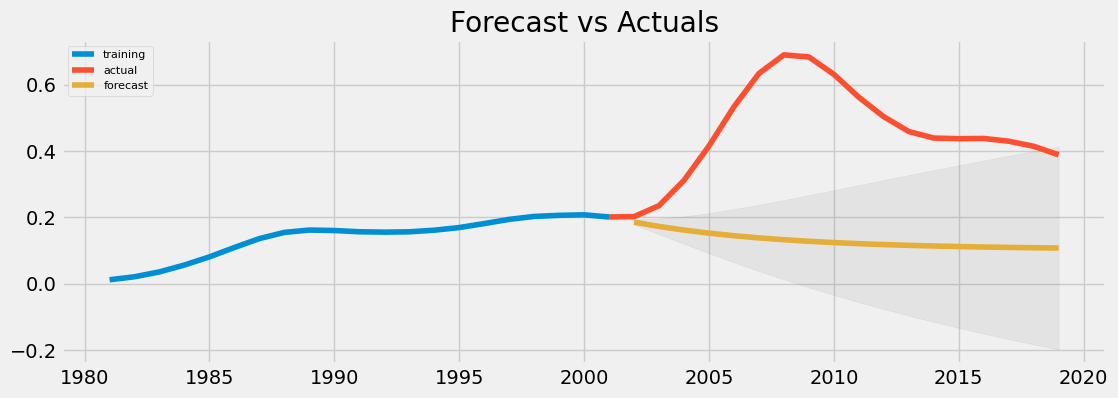

In [44]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast_values
forecast_values = fitted.forecast(19, alpha=0.05) # # 95% confidence interval  --> alpha = 0.05; 19 is the shape of the test set

# Unpack the forecasted values
fc = forecast_values  # Forecasted values

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Get the confidence intervals from the forecast object
forecast_object = fitted.get_forecast(steps=19, alpha=0.05)
conf_int = forecast_object.conf_int()

# Create pandas series for lower and upper bounds of the confidence interval
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # The above code uses
#iloc to access the columns of the conf_int DataFrame correctly, ensuring that the lower_series and upper_series are created with the appropriate data.

# Plot the forecast and confidence interval
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(test.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()